In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('new_data1.csv')

In [3]:
df.head()

,user_name,daily_profit,daily_income,expenses,coeff,p_value
0,00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales,82.057523,6220.60697,6138.549447,-0.731327,0.851442
1,009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales,18.768728,16376.42800,16357.659272,-19.845017,0.047304
2,009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales,19.840337,17489.60720,17469.766863,-24.935850,0.084332
3,009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income,55.199238,4383.18000,4327.980762,3.283642,0.338881
4,009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...,3.429364,3198.61200,3195.182636,-3.546503,0.172920


In [4]:
df.shape

(3148, 6)

In [5]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,daily_profit,daily_income,expenses,coeff,p_value
daily_profit,1,0.393878,0.381744,-0.302945,0.00893632
daily_income,0.393878,1,0.999913,-0.300978,-0.089337
expenses,0.381744,0.999913,1,-0.298311,-0.0899612
coeff,-0.302945,-0.300978,-0.298311,1,0.0485508
p_value,0.00893632,-0.089337,-0.0899612,0.0485508,1


In [6]:
df = df.drop(["expenses"], axis=1)

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,daily_profit,daily_income,coeff,p_value
daily_profit,1,0.393878,-0.302945,0.00893632
daily_income,0.393878,1,-0.300978,-0.089337
coeff,-0.302945,-0.300978,1,0.0485508
p_value,0.00893632,-0.089337,0.0485508,1


In [8]:
df = df.drop(["user_name", "p_value"], axis =1)

In [9]:
df.head()

,daily_profit,daily_income,coeff
0,82.057523,6220.60697,-0.731327
1,18.768728,16376.42800,-19.845017
2,19.840337,17489.60720,-24.935850
3,55.199238,4383.18000,3.283642
4,3.429364,3198.61200,-3.546503


In [10]:
np.any(np.isnan(df))

False

In [11]:
sd = StandardScaler()
sd1 = RobustScaler()
df = sd.fit_transform(df)
df = sd1.fit_transform(df)

In [12]:
print(df)

[[ 1.39005579  0.21126579  0.07356703]
 [ 0.27383456  0.89824078 -0.68079614]
 [ 0.29273447  0.97354008 -0.88171688]
 ...
 [-6.43862039  2.51984482 -5.29643375]
 [29.74069511  6.36236278  0.1084323 ]
 [ 0.8530626   0.47955877 -0.6707441 ]]


In [13]:
df = pd.DataFrame(df)

In [14]:
df.head()

,0,1,2
0,1.390056,0.211266,0.073567
1,0.273835,0.898241,-0.680796
2,0.292734,0.973540,-0.881717
3,0.916358,0.086976,0.232026
4,0.003295,0.006848,-0.037540


In [15]:
df.columns = ['new_profit','new_income', 'coeff']

In [16]:
df.shape

(3148, 3)

In [17]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

<IPython.core.display.Javascript object>


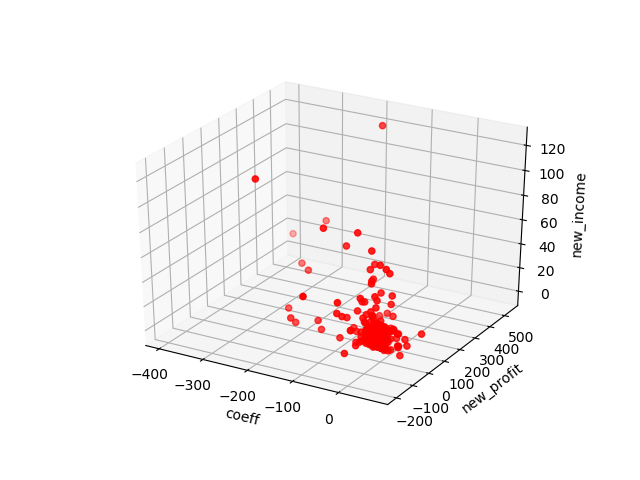

In [18]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [19]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df)
labels = kmeans_model.predict(df)

In [20]:
k_means = labels

<IPython.core.display.Javascript object>


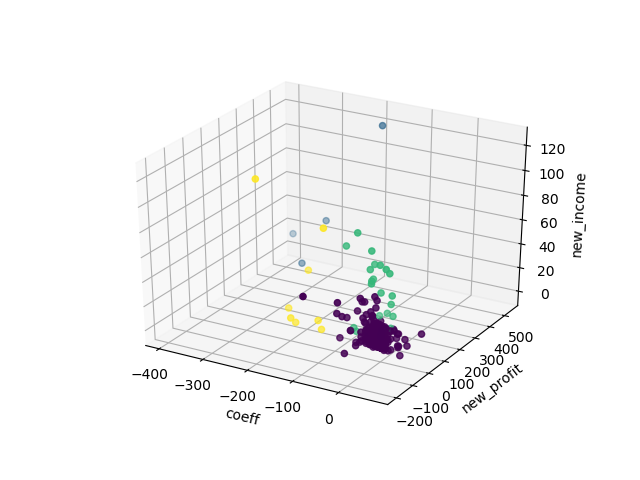

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df["coeff"]
y = df["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [22]:
X = df.values
print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(davies_bouldin_score(X, labels))

0.9312552826379671
0.6815657835503977


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [23]:
dbscan = DBSCAN(eps=4,min_samples=10)
clusters = dbscan.fit_predict(df)

In [24]:
dbscan = clusters

<IPython.core.display.Javascript object>


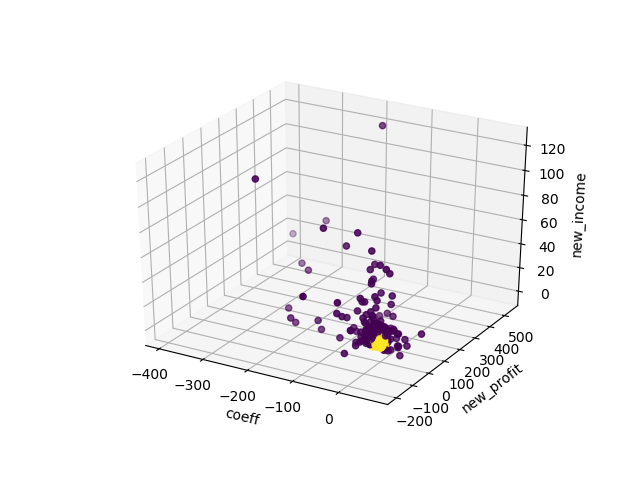

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clusters, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [26]:
X = df.values
print(metrics.silhouette_score(X, clusters, metric='euclidean'))
print(davies_bouldin_score(X, clusters))

0.8522219015716463
1.5340512256890946


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [27]:
clusters2 = AgglomerativeClustering(n_clusters=4).fit_predict(df)

<IPython.core.display.Javascript object>


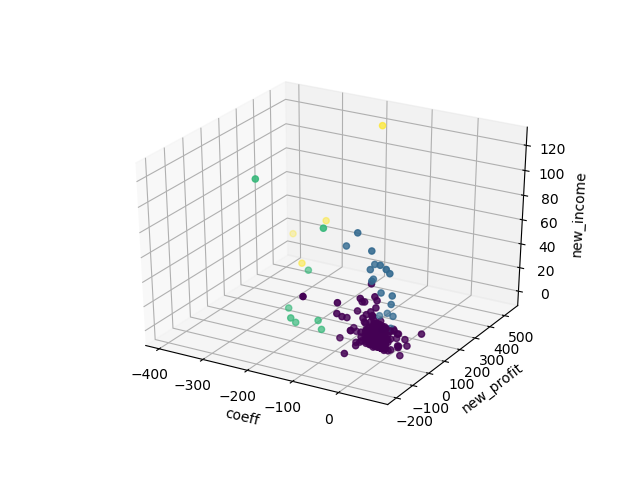

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clusters2, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')
plt.show()

In [29]:
agg=clusters2

In [30]:
X = df.values
print(metrics.silhouette_score(X, clusters2, metric='euclidean'))
print(davies_bouldin_score(X, clusters2))

0.9351265249097572
0.6535140813980078


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [31]:
from sklearn.cluster import MiniBatchKMeans
MBK = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=20, max_iter=10).fit(df)
cluster3 = MBK.predict(df)

<IPython.core.display.Javascript object>


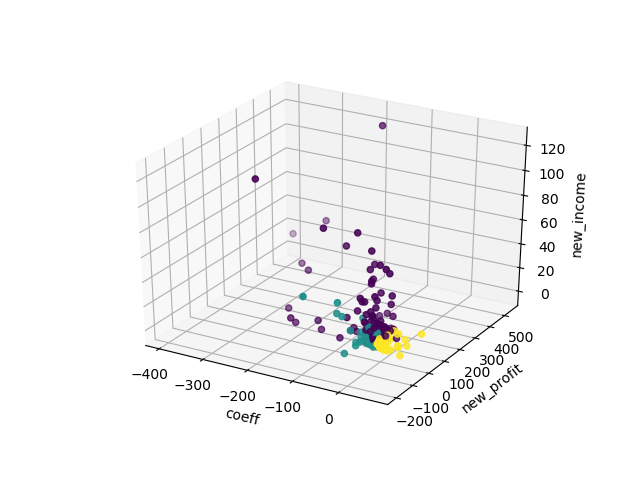

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=cluster3, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [33]:
minbatch = cluster3

In [34]:
X = df.values
print(metrics.silhouette_score(X, cluster3, metric='euclidean'))
print(davies_bouldin_score(X, cluster3))

0.7614866179061823
1.3018027592946886


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [35]:
df1 = pd.read_csv('new_data1.csv')

In [36]:
df1.shape

(3148, 6)

In [37]:
df1.tail()

,user_name,daily_profit,daily_income,expenses,coeff,p_value
3143,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent rece...,2.736093,2074.821429,2072.085335,-1.435414,0.004812
3144,ff436d63-450a-4f45-925f-c908554883bd+Interest ...,-0.005940,0.644545,0.650486,-0.003159,0.190206
3145,ff436d63-450a-4f45-925f-c908554883bd+NZ Sales NZD,-361.821761,40349.237273,40711.059034,-136.793819,0.008523
3146,ff436d63-450a-4f45-925f-c908554883bd+Overseas ...,1689.514672,97154.689091,95465.174419,0.152073,0.997909
3147,ff436d63-450a-4f45-925f-c908554883bd+Petty Cas...,51.610466,10186.887500,10135.277034,-19.590324,0.108442


In [38]:
result = pd.concat([df1, pd.DataFrame(k_means), pd.DataFrame(agg), pd.DataFrame(minbatch)], axis=1, sort=False)

In [39]:
result.tail(10)

,user_name,daily_profit,daily_income,expenses,coeff,p_value,0,0,0
3138,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,7.191011,2095.806452,2088.615440,-1.810793,0.001427,0.0,0.0,2.0
3139,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,3.945069,1600.967742,1597.022673,-1.635239,0.000098,0.0,0.0,2.0
3140,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,10.955000,2377.746000,2366.791000,0.395760,0.612955,0.0,0.0,2.0
3141,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,5.411985,1642.741935,1637.329950,-1.431399,0.000212,0.0,0.0,2.0
3142,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,37.680921,2144.285714,2106.604793,2.451488,0.754950,0.0,0.0,2.0
3143,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent rece...,2.736093,2074.821429,2072.085335,-1.435414,0.004812,0.0,0.0,2.0
3144,ff436d63-450a-4f45-925f-c908554883bd+Interest ...,-0.005940,0.644545,0.650486,-0.003159,0.190206,0.0,0.0,0.0
3145,ff436d63-450a-4f45-925f-c908554883bd+NZ Sales NZD,-361.821761,40349.237273,40711.059034,-136.793819,0.008523,0.0,0.0,2.0
3146,ff436d63-450a-4f45-925f-c908554883bd+Overseas ...,1689.514672,97154.689091,95465.174419,0.152073,0.997909,NaN,NaN,NaN
3147,ff436d63-450a-4f45-925f-c908554883bd+Petty Cas...,51.610466,10186.887500,10135.277034,-19.590324,0.108442,NaN,NaN,NaN


In [40]:
result.shape

(3148, 9)

In [41]:
result.columns = ['company_id', 'daily_profit', "daily_income", "daily_outcome", "coeff", "p_value", "K_means", "Agglomerative", "Min_Batch"]

In [42]:
import collections
counter=collections.Counter(k_means)
print(counter)

Counter({0: 3111, 2: 23, 3: 8, 1: 4})


In [43]:
counter=collections.Counter(agg)
print(counter)

Counter({0: 3116, 1: 18, 2: 8, 3: 4})


In [44]:
counter=collections.Counter(minbatch)
print(counter)

Counter({2: 2859, 0: 153, 1: 134})


In [45]:
result.loc[(result['K_means'] == 0)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
0,00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales,82.057523,6220.606970,6138.549447,-0.731327,8.514418e-01,0.0,0.0,2.0
1,009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales,18.768728,16376.428000,16357.659272,-19.845017,4.730355e-02,0.0,0.0,2.0
2,009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales,19.840337,17489.607200,17469.766863,-24.935850,8.433158e-02,0.0,0.0,2.0
3,009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income,55.199238,4383.180000,4327.980762,3.283642,3.388806e-01,0.0,0.0,2.0
4,009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...,3.429364,3198.612000,3195.182636,-3.546503,1.729202e-01,0.0,0.0,2.0
5,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Interest ...,0.003452,0.207500,0.204048,0.000977,2.621649e-02,0.0,0.0,2.0
6,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales,-76.965060,40327.186154,40404.151214,-70.356450,3.163588e-04,0.0,0.0,2.0
7,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales - D...,0.312251,383.801176,383.488925,-1.107551,2.503675e-02,0.0,0.0,2.0
8,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales - D...,15.916327,15298.783600,15282.867273,-85.389270,4.546976e-07,0.0,0.0,2.0
9,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales - D...,12.982346,14981.270000,14968.287654,-55.802315,1.491866e-04,0.0,0.0,2.0


In [46]:
result.loc[(result['K_means'] == 3)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
624,3b6fece2-e186-4fb1-bf9a-5b055fe5bf27+Sales - S...,-236.608214,25417.660435,25654.268649,-75.373948,3.754289e-02,3.0,2.0,0.0
1026,570b1253-59f9-4d5e-b2fc-ac22488662ca+Interest ...,0.001860,0.106667,0.104806,0.000069,8.609659e-01,3.0,2.0,0.0
1034,57c72611-c9be-4f6b-be8d-562f549953fe+Rebates,821.947611,20622.038000,19800.090389,27.548726,5.428473e-01,3.0,2.0,0.0
1311,72aabebc-f2fd-46ab-b49a-227254b9ad41+MOE Techn...,9.195652,7677.257500,7668.061848,-6.249532,2.784369e-01,3.0,2.0,0.0
2719,d8c9459e-2df6-430c-ac2b-a51f6455fc2d+Test & Ta...,0.846060,200.669231,199.823171,-0.130255,5.769623e-01,3.0,2.0,0.0
2777,df170346-9018-40cc-b045-5b4f46c34447+Sales,-118.245803,94177.908000,94296.153803,-332.968140,1.109849e-09,3.0,2.0,0.0
2839,e58ada3a-86ed-4f82-a3a8-9f97e77c1a0c+Other rev...,77.777778,2606.583333,2528.805556,-576.598972,1.011070e-01,3.0,2.0,0.0
2840,e58ada3a-86ed-4f82-a3a8-9f97e77c1a0c+Other rev...,1189.666111,24242.763333,23053.097222,-4964.255296,1.000405e-01,3.0,2.0,0.0


In [47]:
result.loc[(result['K_means'] == 1)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
621,3b6fece2-e186-4fb1-bf9a-5b055fe5bf27+Consultin...,-79.938498,26727.610000,26807.548498,-79.929161,1.228234e-07,1.0,3.0,0.0
1225,6e8bdb4d-9d05-4c94-b45f-610c931316d6+Sales,216.532634,39000.834444,38784.301810,-104.607672,1.870092e-03,1.0,3.0,0.0
1383,786467e5-cc05-4f42-a891-4c2174d125cc+Other Rev...,1361.667243,84646.739333,83285.072091,332.478520,6.966350e-03,1.0,3.0,0.0
2643,d3b7d6ef-e63a-44f6-b7f3-a5801dcfd44d+Research/...,78.878685,9072.833214,8993.954529,-13.226560,6.465662e-03,1.0,3.0,0.0


In [48]:
result.loc[(result['K_means'] == 2)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
15,02246f3d-262e-4fa6-9db6-b98df684b210+Sales,5136.058455,747918.426389,742782.367934,-1424.312673,0.002011,2.0,1.0,0.0
135,0a6db64d-5fe6-4265-8890-e24c71188e21+License F...,3402.278714,31654.774000,28252.495286,-1248.430761,0.010516,2.0,0.0,0.0
452,2ce9c5dd-c01d-4b0d-8acc-b0f62b69972f+Accommoda...,3332.637059,16497.388387,13164.751328,-1878.681803,0.116199,2.0,0.0,0.0
465,2d360865-7b07-4639-94da-a73e5840bc99+Sales,3460.587078,802396.832903,798936.245825,-93.182922,0.861818,2.0,1.0,0.0
541,34bb7e8a-b31c-41d3-87c4-318e372a338e+Sales - N...,134.246287,1233.079545,1098.833258,-10.953815,0.199805,2.0,1.0,0.0
617,3b0af4ee-0a5d-47c3-a30a-76032ab5b213+Interest ...,191.196239,5337.916667,5146.720428,80.402927,0.115927,2.0,1.0,0.0
642,3cc9f3e8-9d71-4e0a-94dd-a4090afba37c+Interest ...,45.680466,4916.965238,4871.284772,6.110836,0.503625,2.0,1.0,0.0
714,407f2b61-b9e7-4616-837e-9b45617817a5+Sales - B...,127.550102,116247.583750,116120.033648,61.420733,0.334854,2.0,1.0,0.0
860,4b9cad9b-f2d3-4fad-8144-29d61b27772f+Shop Sales,107.584321,13683.241395,13575.657074,-44.550531,0.000397,2.0,1.0,0.0
1030,57c72611-c9be-4f6b-be8d-562f549953fe+Earthworks,121.146018,3784.562500,3663.416482,-22.290221,0.483485,2.0,1.0,0.0


In [49]:
result.loc[(result['K_means'] == 2)].mean()

daily_profit       1054.321897
daily_income     119101.210989
daily_outcome    118046.889092
coeff              -257.640668
p_value               0.266911
K_means               2.000000
Agglomerative         0.782609
Min_Batch             0.000000
dtype: float64

In [50]:
result.loc[(result['K_means'] == 1)].mean()

daily_profit       394.285016
daily_income     39862.004248
daily_outcome    39467.719232
coeff               33.678782
p_value              0.003826
K_means              1.000000
Agglomerative        3.000000
Min_Batch            0.000000
dtype: float64

In [51]:
result.loc[(result['K_means'] == 0)].mean()

daily_profit       121.599188
daily_income     23491.338125
daily_outcome    23369.738937
coeff              -79.448165
p_value              0.260944
K_means              0.000000
Agglomerative        0.000000
Min_Batch            1.881067
dtype: float64

In [52]:
result.loc[(result['K_means'] == 3)].mean()

daily_profit       218.072632
daily_income     21868.123312
daily_outcome    21650.050680
coeff             -741.003418
p_value              0.312238
K_means              3.000000
Agglomerative        2.000000
Min_Batch            0.000000
dtype: float64

In [53]:
result.to_csv("K_means.csv",index=False)